(1347, 28)
(1180, 27)


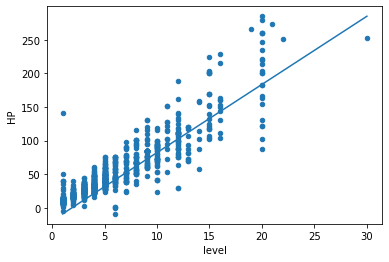

Help on function HP_and_level_correlation_scatter in module __main__:

HP_and_level_correlation_scatter()
    Performs a scatter diagram solely focusing on the relationship between column HP(hitpoints) and 
    column level, in order to see whether there is any visual correlation



In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def preparing_data():
    """Sorting the data by:
        -Getting rid of biased rows 
        -Removing the 'date' column as it isn't possible to remove duplicates else
        -Removing duplicates
        -This method is going to be used as a helpermethod as we are going to use this data several times
        
        :return: Data consisting of a dataframe with information about dnd-stats
    """
    
    data = pd.read_csv('https://raw.githubusercontent.com/oganm/dndstats/master/docs/charTable.tsv', sep='\t')
    print(data.shape)
    #print('dataShape before preparation: ', data.shape)

    #dropping the date column
    data = data.drop(columns=['date'])

    #removing dublicates
    data.drop_duplicates(subset =None, keep = 'first', inplace = True)

    #removing a potentially biased row (level/hp corresponding to 89/1149)...
    data = data[data.level != 89]
    print(data.shape)
    #print('dataShape ready: ', data.shape)
    return data
 

def HP_and_level_correlation_scatter():
    
    """Performs a scatter diagram solely focusing on the relationship between column HP(hitpoints) and 
    column level, in order to see whether there is any visual correlation
    """
    data = preparing_data()
    
    # extracting data from column HP and level
    extract_data = pd.DataFrame(data, columns= ['HP','level'])
 
    # making a list of HP's and level's
    hp_list = []
    level_list = []
    for i, r in extract_data.iterrows():
        level_list.append((r['level']))
        hp_list.append((r['HP']))

    # getting min/max values for column HP and level
    minHP = min(hp_list)
    maxHP = max(hp_list)

    minL = min(level_list)
    maxL = max(level_list)

    # making a scatter diagram in order to check for visible correlation 
    data.plot.scatter(x = 6,y = 8)
    plt.plot([minL, maxL], [minHP, maxHP])
    plt.show()


HP_and_level_correlation_scatter()
help(HP_and_level_correlation_scatter)



In [1]:
# preparing for HP/level ratio analysis

def bar_chart_for_HP_and_level_ratio(): 
    """Performs general statistics only focusing on the columns race, HP and level. 
    The data is grouped by race with focus on HP and level stats for each of the races. 
    A count column has been added that counts total occurences based on race. We have set the limit count to 10 in order to 
    get rid of potentially biased data. 
    We have visualized the data by getting the agg values [count,min,max,mean] for the data and also by plotting the data so 
    we can get an overview over how the different races are represented with respect to their count.
    
    """
    data = preparing_data()

    # only keeping 3 columns (race,HP and level)
    data = data.drop(columns=['name','justClass','subclass','feats','AC','Str','Dex','Con','Int','Wis','Cha','alignment','skills',
                         'weapons','spells','day','processedAlignment','good','lawful','processedRace','processedSpells',
                         'processedWeapons','background','class'])
    
    #getting an overview with key values
    data_overview = data.groupby(['race']).agg(['count','min','max','mean'])[:5]
    print(data_overview)

    #adding a count column to count total occurrences based on race
    data['count'] = data.groupby('race')['race'].transform('count')
    print(data.head())

    #removing occurences less than 10 in order to get rid of potentially biased data
    data = data[data['count'] >= 10]
    
    #plotting for visualization grouped by race-mean
    %matplotlib inline
    data_race_count = data.drop(columns=["HP","level"])
    data_race_count.groupby('race').mean().plot(kind='bar', figsize=(20,12))

bar_chart_for_HP_and_level_ratio()
help(bar_chart_for_HP_and_level_ratio)

NameError: name 'preparing_data' is not defined

In [3]:
import sklearn
import sklearn.linear_model
import numpy as np


def model_prediction_for_HP(level_input):
    """Performs prediction on new HP for given level_input. The data is modelled and fitted in order to 
    calculate the predicted value for HP  
    
    :param level_input: number
        number to insert in order to calculate the predicted HP rate.
        
    :return: numpy.float64
        The predicted HP value for a given level-input             
    """
    
    data = preparing_data()
    model = sklearn.linear_model.LinearRegression()
    
    HP = data['HP']
    level = data['level']

    level_reshape = np.array(level).reshape(-1, 1)

    model.fit(level_reshape, HP)

    predicted = model.predict(level_reshape)
    #The given level_input given as parameter is used
    predict_HP = model.predict([[level_input]])
    #print('predicting new HP for given level_input is: {} '.format(predict_HP[0]))
    return predict_HP[0]

    
def model_prediction_for_level(HP_input):
    """Performs prediction on new level for given HP_input. The data is modelled and fitted in order to 
    calculate the predicted value for level  
    
    :param HP_input: number
        number to insert in order to calculate the predicted level.
        
    :return: numpy.float64
        The predicted level value for a given HP-input             
    """

    data = preparing_data()
    model = sklearn.linear_model.LinearRegression()
    
    HP = data['HP']
    level = data['level']

    HP_reshape = np.array(HP).reshape(-1, 1)

    model.fit(HP_reshape, level)

    predicted = model.predict(HP_reshape)
    #The given HP_input given as parameter is used
    predict_level = model.predict([[HP_input]])
    #print('predicting new level for given HP_input is: {} '.format(predict_level[0]))
    return predict_level[0]


def model_score_for_data():
    """Getting the model_score for the used data.
    
    :return: numpy.float64
        The calculated model score for HP and level columns
    """
    data = preparing_data()
    model = sklearn.linear_model.LinearRegression()
    
    HP = data['HP']
    level = data['level']
    
    level_reshape = np.array(level).reshape(-1, 1)   
    
    model.fit(level_reshape, HP)    
    
    predicted = model.predict(level_reshape)
    return model.score(level_reshape,HP)
     
#model_prediction_for_HP(20)
#model_prediction_for_level(274)    
model_score_for_data()    

0.8389189281216363

In [12]:
def check_for_HPfitness_given_Level_input(level,hp,percentage_error):
    """Performs predictions on whether the parameter level and parameter HP constitutes a sound match in relation to 
    our previuosly modelled data. Here we also operate with a percentage_error value which is used to accept certain
    degree of deviation.

    :param level: number
        number to insert in order to calculate the HP rate according to our model prediction.
        
    :param hp: number
        number to insert in order to check and compare our hp value with the modelled hp value.

    :param percentage_error: number
        number to insert in order to accept a certain degree of deviation between the fitness of param hp and the 
        calculated/modelled hp value.
    
    :return: boolean
        True if there is a sound match   
    """
    
    predicted_hp_given_level = round(model_prediction_for_HP(level),2)
    
    #finding the boundary-value
    boundary_value = round(predicted_hp_given_level * percentage_error/100,2)
    print("boundary_value: ",boundary_value)
    
    lower_level_boundary = round(predicted_hp_given_level - boundary_value,2)
    upper_level_boundary = round(predicted_hp_given_level + boundary_value,2)
    
    print("lower/upper boundary_values: ",lower_level_boundary,",",upper_level_boundary)
    
    return hp >= lower_level_boundary and hp <= upper_level_boundary
    
check_for_HPfitness_given_Level_input(89,1149,20)
 

boundary_value:  163.28
lower/upper boundary_values:  653.13 , 979.69


False